In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline


4 17
18 31
32 45
47 56
63 71
74 85
87 103
103 118


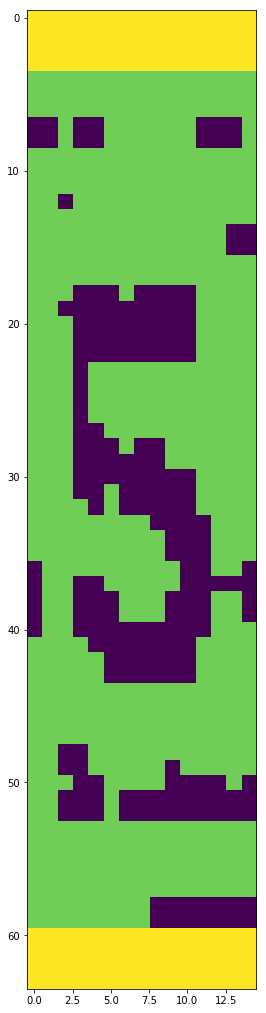

In [76]:
img=cv2.imread('/home/administrator/1/14_1403_B997TP35.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(15,18))
img = cv2.adaptiveThreshold(img, 200, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 3)
img[img.shape[0] - 4: img.shape[0], 0:img.shape[1]] = 255
img[0: 4, 0:img.shape[1]] = 255
imgplot = plt.imshow(img)
mn = []
for i in range(0, img.shape[1]):
    mn.append(np.mean(img[:, i:i + 3]))
    i += 3
md = np.median(mn)*1.15
indx = np.where(mn >= md)
plt.plot([0, img.shape[1]], [md, md])
plt.plot(mn)
if len(indx) > 0:
    indx = indx[0]
for i in range(1, len(indx)):
    if (indx[i] - indx[i-1]) < 3:
        continue
    print(indx[i-1], indx[i])
    imgs.append(np.copy(img[0:img.shape[0], indx[i-1]:indx[i]]))
for img in imgs:
    plt.imshow(img)